# Homework 02

In [253]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load Data

In [254]:
data = pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv')
data.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [255]:
data['international_students'] = pd.to_numeric(
    data['international_students'].apply(
        lambda x: str(x).replace(',', '')
        if x != 'nan'
        else '0'
    ), errors='coerce'
)
data['faculty_count'] = pd.to_numeric(
    data['faculty_count'].apply(
        lambda x: str(x).replace(',', '')
        if x != 'nan'
        else '0'
    ), errors='coerce'
)

In [256]:
data.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,3730.0,M,3065.0
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,3879.0,L,4725.0
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,5877.0,L,4646.0
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,7925.0,L,5800.0
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692.0,S,968.0


## Inspect Data / EDA

In [257]:
set(data.year)

{2017, 2018, 2019, 2020, 2021, 2022}

In [258]:
data_by_year = data.groupby('year')

In [259]:
list(data_by_year)[0][1]

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,3730.0,M,3065.0
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,3879.0,L,4725.0
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,5877.0,L,4646.0
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,7925.0,L,5800.0
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692.0,S,968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Stockholm School of Economics,2017,NaN,NaN,https://www.topuniversities.com/universities/s...,Sweden,NaN,Europe,https://www.topuniversities.com/sites/default/...,Private,Very High,NaN,NaN,S,NaN
929,Bocconi University,2017,NaN,NaN,https://www.topuniversities.com/universities/b...,Italy,Milan,Europe,https://www.topuniversities.com/sites/default/...,Private,Very High,15.0,1942.0,L,837.0
930,Université de Technologie de Compiègne (UTC),2017,NaN,NaN,https://www.topuniversities.com/universities/u...,France,Compiègne,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,NaN,NaN,S,NaN
931,Prague University of Economics and Business,2017,NaN,NaN,https://www.topuniversities.com/universities/p...,Czech Republic,Prague,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,27.0,3322.0,L,468.0


In [260]:
list(data_by_year)[-1][1]

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
5182,Massachusetts Institute of Technology (MIT),2022,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,3730.0,M,3065.0
5183,University of Oxford,2022,2,99.5,https://www.topuniversities.com/universities/u...,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,3.0,8442.0,L,6708.0
5184,Stanford University,2022,3,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,3879.0,L,4725.0
5185,University of Cambridge,2022,3,98.7,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,7925.0,L,5800.0
5186,Harvard University,2022,5,98.0,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,5877.0,L,4646.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,High,17.0,57.0,L,1174.0
6478,Université de Tunis El Manar,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,Very High,8.0,585.0,L,3504.0
6479,Yarmouk University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Jordan,Irbid,Asia,https://www.topuniversities.com/sites/default/...,Public,Medium,31.0,2826.0,XL,1113.0
6480,Yildiz Technical University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Turkey,Istanbul,Asia,https://www.topuniversities.com/sites/default/...,Public,High,20.0,2394.0,XL,1688.0


## Analysis

We are tasked with "visualizing interesting patterns in the data". Thus it is pertinent to first identify some candidate pattern-types.

Here are some initial ideas:

* Trend in number of international students 2017-2022 (question: split point a

* 

In [261]:
data_by_country = data.groupby('country')

In [262]:
sns.set(rc={'figure.figsize':(24,16)})

<AxesSubplot:xlabel='country', ylabel='international_students'>

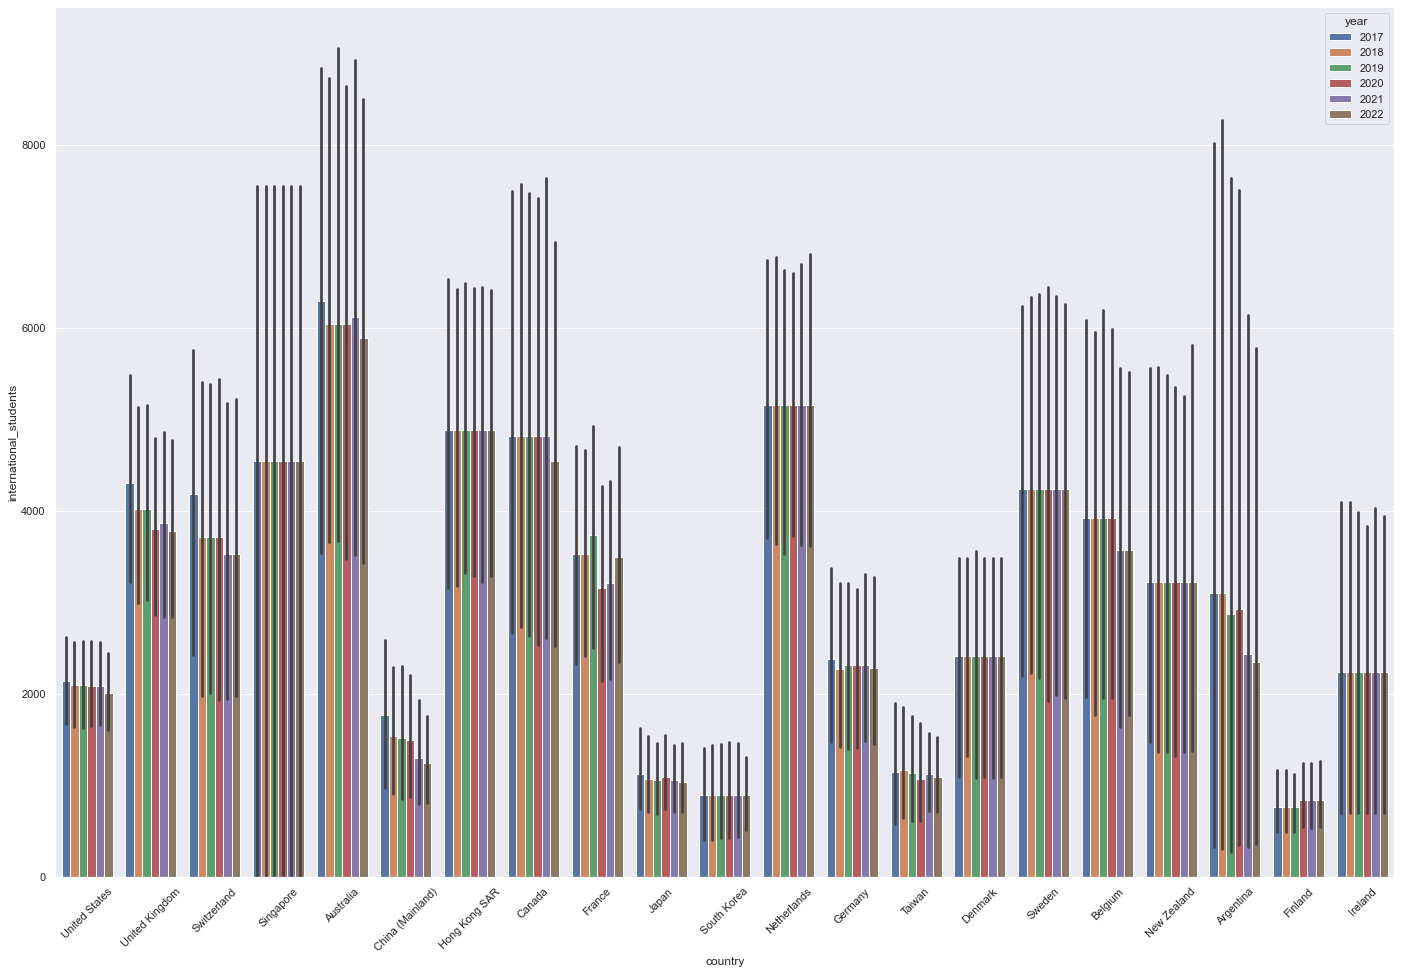

In [263]:
plt.xticks(rotation=45)
sns.barplot(
    x='country',
    y='international_students',
    hue='year',
    data=data[data['country'].isin(set(data.iloc[0:100].country))]
)

In [264]:
data_2022 = list(data_by_year)[-1][1][['university', 'year', 'rank_display', 'score', 'country', 'city', 'region', 'logo', 'faculty_count', 'international_students']]
data_2022 = data_2022.iloc[0:400]
data_2017 = list(data_by_year)[0][1][['university', 'year', 'rank_display', 'score', 'country', 'city', 'region', 'logo', 'faculty_count', 'international_students']]
data_2017 = data_2017.iloc[0:400]
compared_data = pd.merge(data_2022, data_2017, left_on='university', right_on='university')
data = data.rename(index={'China (Mainland)': 'China'})
compared_data['rank_display_x'] = compared_data['rank_display_x'].astype(int)
compared_data['rank_display_y'] = compared_data['rank_display_y'].astype(int)
compared_data.head()

,university,year_x,rank_display_x,score_x,country_x,city_x,region_x,logo_x,faculty_count_x,international_students_x,year_y,rank_display_y,score_y,country_y,city_y,region_y,logo_y,faculty_count_y,international_students_y
0,Massachusetts Institute of Technology (MIT),2022,1,100.0,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,3065.0,3730.0,2017,1,100.0,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,3065.0,3730.0
1,University of Oxford,2022,2,99.5,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...,6708.0,8442.0,2017,6,96.8,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...,6708.0,8442.0
2,Stanford University,2022,3,98.7,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,4725.0,3879.0,2017,2,98.7,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,4725.0,3879.0
3,University of Cambridge,2022,3,98.7,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,5800.0,7925.0,2017,4,97.2,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,5800.0,7925.0
4,Harvard University,2022,5,98.0,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,4646.0,5877.0,2017,3,98.3,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,4646.0,5877.0


In [265]:

ranking_changes = [
    y - x
    if not (math.isnan(x) or math.isnan(y))
    else np.nan
    for x,y in zip(compared_data['rank_display_x'], compared_data['rank_display_y'])
]

compared_data['ranking_change'] = ranking_changes

In [266]:
scaled_ranking_change = [
    (y - x) / min(y, x)
    if not (math.isnan(x) or math.isnan(y))
    else np.nan
    for x,y in zip(compared_data['rank_display_x'], compared_data['rank_display_y'])
]

compared_data['scaled_ranking_change'] = scaled_ranking_change

In [267]:
compared_data.sort_values('ranking_change', ascending=False)

,university,year_x,rank_display_x,score_x,country_x,city_x,region_x,logo_x,faculty_count_x,international_students_x,...,rank_display_y,score_y,country_y,city_y,region_y,logo_y,faculty_count_y,international_students_y,ranking_change,scaled_ranking_change
143,Universiti Sains Malaysia (USM),2022,147,51.0,Malaysia,Gelugor,Asia,https://www.topuniversities.com/sites/default/...,2249.000,4198.000,...,330,34.6,Malaysia,Gelugor,Asia,https://www.topuniversities.com/sites/default/...,2249.000,4198.000,183,1.244898
106,King Abdulaziz University (KAU),2022,109,57.7,Saudi Arabia,Jeddah,Asia,https://www.topuniversities.com/sites/default/...,4054.000,6821.000,...,283,37.6,Saudi Arabia,Jeddah,Asia,https://www.topuniversities.com/sites/default/...,4054.000,6821.000,174,1.596330
218,Qatar University,2022,224,40.7,Qatar,Doha,Asia,https://www.topuniversities.com/sites/default/...,1163.000,3197.000,...,393,30.6,Qatar,Doha,Asia,https://www.topuniversities.com/sites/default/...,1163.000,3197.000,169,0.754464
140,Universiti Kebangsaan Malaysia (UKM),2022,144,52.0,Malaysia,Bangi,Asia,https://www.topuniversities.com/sites/default/...,2829.000,2410.000,...,302,36.7,Malaysia,Bangi,Asia,https://www.topuniversities.com/sites/default/...,2829.000,2410.000,158,1.097222
83,Université Paris-Saclay,2022,86,64.9,France,NaN,Europe,https://www.topuniversities.com/sites/default/...,8010.000,7649.000,...,241,42.0,France,NaN,Europe,https://www.topuniversities.com/sites/default/...,8010.000,7649.000,155,1.802326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Royal Holloway University of London,2022,334,32.2,United Kingdom,Egham,Europe,https://www.topuniversities.com/sites/default/...,831.000,3.705,...,235,42.6,United Kingdom,Egham,Europe,https://www.topuniversities.com/sites/default/...,831.000,3.705,-99,-0.421277
295,Université Grenoble Alpes,2022,314,33.6,France,Grenoble,Europe,https://www.topuniversities.com/sites/default/...,3088.000,8880.000,...,206,46.1,France,Grenoble,Europe,https://www.topuniversities.com/sites/default/...,3088.000,8880.000,-108,-0.524272
330,Norwegian University of Science And Technology,2022,369,30.3,Norway,Trondheim,Europe,https://www.topuniversities.com/sites/default/...,3.132,2.950,...,259,39.8,Norway,Trondheim,Europe,https://www.topuniversities.com/sites/default/...,3.132,2.950,-110,-0.424710
306,Technion - Israel Institute of Technology,2022,330,32.4,Israel,Haifa,Asia,https://www.topuniversities.com/sites/default/...,1.616,526.000,...,213,45.5,Israel,Haifa,Asia,https://www.topuniversities.com/sites/default/...,1.616,526.000,-117,-0.549296


In [268]:
pd.set_option('display.max_rows', 100)

In [269]:
compared_data_by_country_means = compared_data.groupby('country_x').median()
compared_data_by_country_means.sort_values('ranking_change', ascending=False)

,year_x,rank_display_x,score_x,faculty_count_x,international_students_x,year_y,rank_display_y,score_y,faculty_count_y,international_students_y,ranking_change,scaled_ranking_change
country_x,,,,,,,,,,,,
Qatar,2022.0,224.0,40.70,1163.0000,3197.0000,2017.0,393.0,30.60,1163.0000,3197.0000,169.0,0.754464
Malaysia,2022.0,144.0,52.00,2249.0000,4198.0000,2017.0,288.0,37.40,2249.0000,4198.0000,127.0,1.046154
Belarus,2022.0,295.0,34.90,4173.0000,4264.0000,2017.0,354.0,33.00,4173.0000,4264.0000,59.0,0.200000
Poland,2022.0,308.0,33.90,3658.0000,2892.0000,2017.0,366.0,32.10,3658.0000,2892.0000,58.0,0.188312
Estonia,2022.0,300.0,34.70,1605.0000,1400.0000,2017.0,347.0,33.60,1605.0000,1400.0000,47.0,0.156667
Italy,2022.0,171.0,47.20,2516.0000,5536.0000,2017.0,223.0,44.00,2516.0000,5536.0000,42.0,0.253012
Kazakhstan,2022.0,251.5,39.75,2025.1750,1527.5385,2017.0,290.5,38.15,2025.1750,1527.5385,39.0,0.200200
Czech Republic,2022.0,266.0,37.10,5019.0000,9080.0000,2017.0,302.0,36.70,5019.0000,9080.0000,36.0,0.135338
Indonesia,2022.0,290.0,35.10,4210.0000,1412.0000,2017.0,325.0,35.00,4210.0000,1412.0000,35.0,0.120690


In [270]:
compared_data_by_country_std = compared_data.groupby('country_x').std()
compared_data_by_country_std.head()

,year_x,rank_display_x,score_x,faculty_count_x,international_students_x,year_y,rank_display_y,score_y,faculty_count_y,international_students_y,ranking_change,scaled_ranking_change
country_x,,,,,,,,,,,,
Argentina,0.0,178.898016,24.748737,8695.999195,20119.309245,0.0,159.099026,21.071782,8695.999195,20119.309245,19.798990,0.191339
Australia,0.0,108.172122,18.520301,1221.512230,8873.697988,0.0,124.998989,19.384635,1221.512230,8873.697988,34.300951,0.172194
Austria,0.0,68.242216,7.281712,1459.272878,6131.467280,0.0,76.350071,8.473685,1459.272878,6131.467280,8.386497,0.025012
Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,0.0,61.379693,10.389947,1649.137037,2490.911594,0.0,51.843675,8.652264,1649.137037,2490.911594,20.951531,0.139797


In [271]:
ordered_countries = compared_data_by_country_means.sort_values('ranking_change', ascending=False).index
ordered_ranking_changes = compared_data_by_country_means.sort_values('ranking_change', ascending=False)['ranking_change']

In [276]:
ordered_countries_scaled = compared_data_by_country_means.sort_values('scaled_ranking_change', ascending=False).index
ordered_scaled_ranking_changes = compared_data_by_country_means.sort_values('scaled_ranking_change', ascending=False)['scaled_ranking_change']
# plt.xticks(rotation=45)
# sns.barplot(x=ordered_countries_scaled, y=ordered_scaled_ranking_changes)

<AxesSubplot:xlabel='country_x', ylabel='ranking_change'>

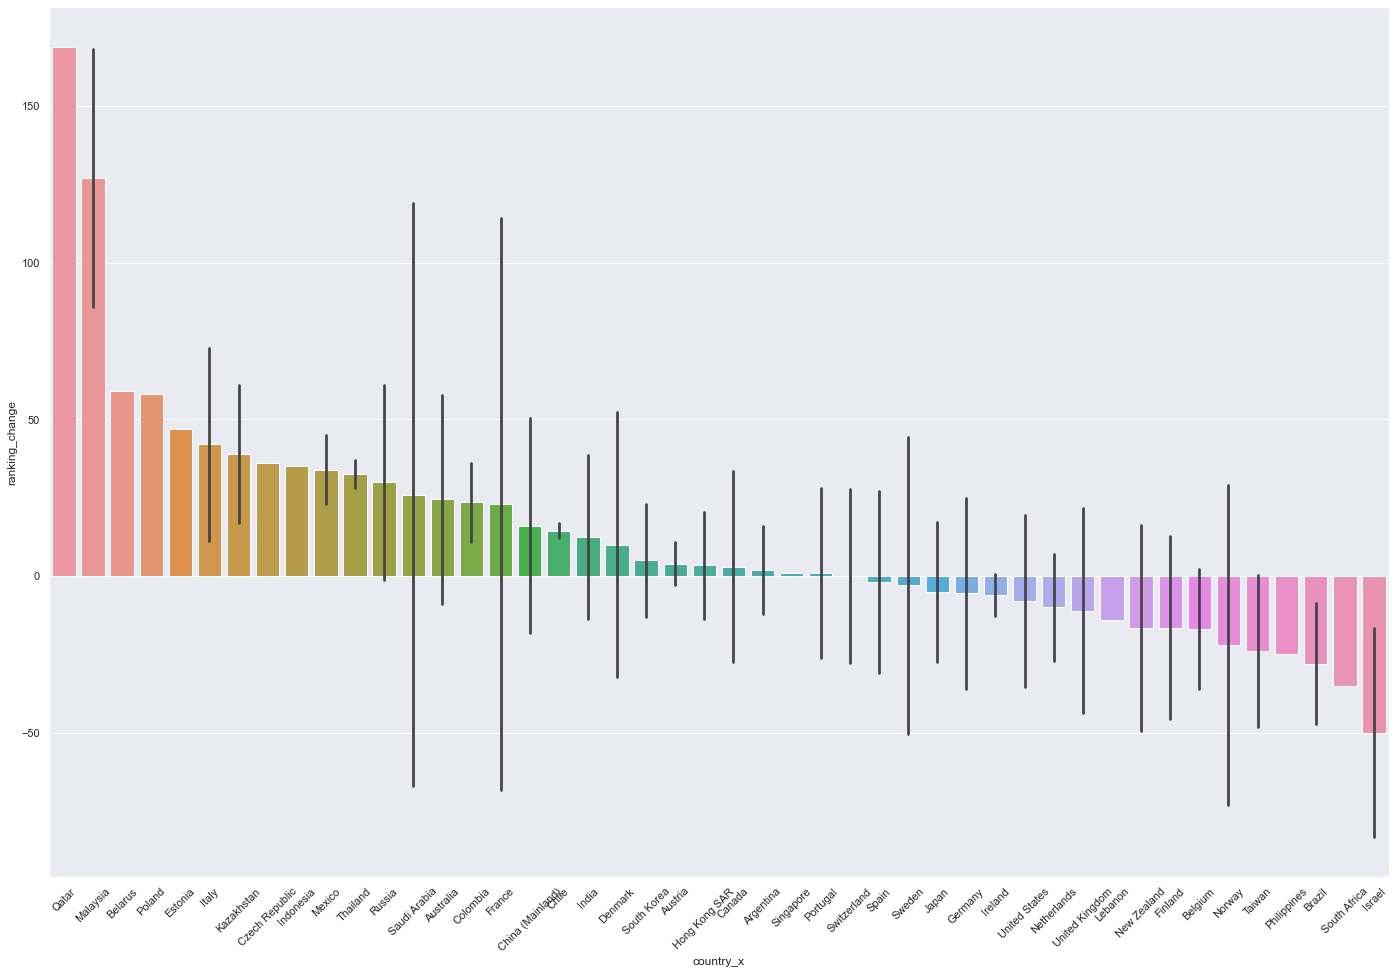

In [275]:
plt.xticks(rotation=45)
sns.barplot(data=compared_data, x='country_x', y='ranking_change', ci='sd', order=ordered_countries, estimator=np.median)

<AxesSubplot:xlabel='country_x', ylabel='scaled_ranking_change'>

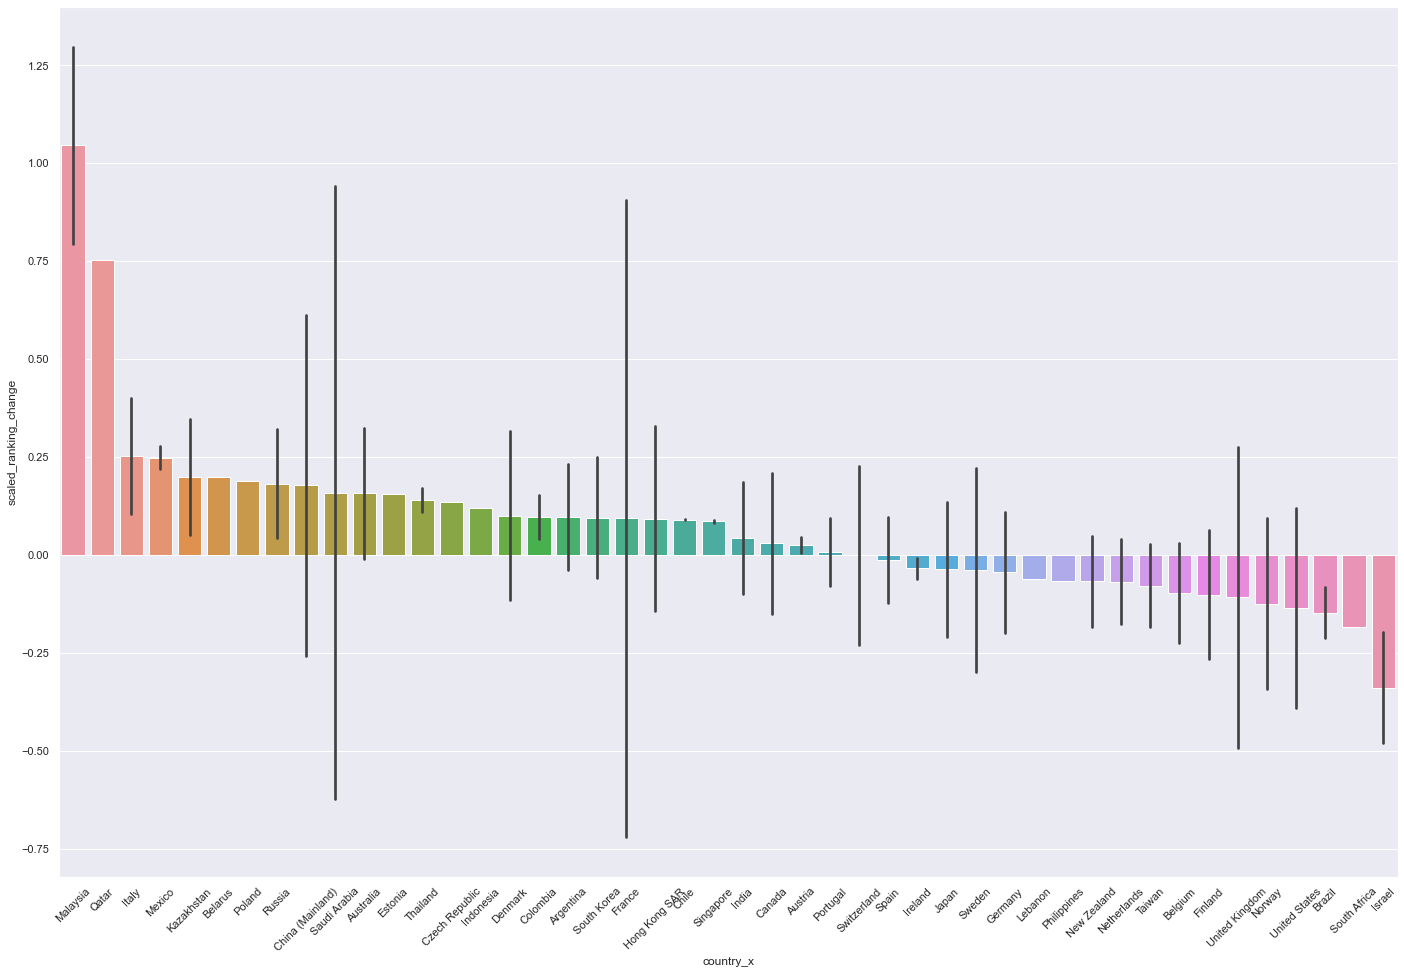

In [277]:
plt.xticks(rotation=45)
sns.barplot(data=compared_data, x='country_x', y='scaled_ranking_change', ci='sd', order=ordered_countries_scaled, estimator=np.median)

In [280]:
compared_data.sort_values('ranking_change', ascending=False)

,university,year_x,rank_display_x,score_x,country_x,city_x,region_x,logo_x,faculty_count_x,international_students_x,...,rank_display_y,score_y,country_y,city_y,region_y,logo_y,faculty_count_y,international_students_y,ranking_change,scaled_ranking_change
143,Universiti Sains Malaysia (USM),2022,147,51.0,Malaysia,Gelugor,Asia,https://www.topuniversities.com/sites/default/...,2249.000,4198.000,...,330,34.6,Malaysia,Gelugor,Asia,https://www.topuniversities.com/sites/default/...,2249.000,4198.000,183,1.244898
106,King Abdulaziz University (KAU),2022,109,57.7,Saudi Arabia,Jeddah,Asia,https://www.topuniversities.com/sites/default/...,4054.000,6821.000,...,283,37.6,Saudi Arabia,Jeddah,Asia,https://www.topuniversities.com/sites/default/...,4054.000,6821.000,174,1.596330
218,Qatar University,2022,224,40.7,Qatar,Doha,Asia,https://www.topuniversities.com/sites/default/...,1163.000,3197.000,...,393,30.6,Qatar,Doha,Asia,https://www.topuniversities.com/sites/default/...,1163.000,3197.000,169,0.754464
140,Universiti Kebangsaan Malaysia (UKM),2022,144,52.0,Malaysia,Bangi,Asia,https://www.topuniversities.com/sites/default/...,2829.000,2410.000,...,302,36.7,Malaysia,Bangi,Asia,https://www.topuniversities.com/sites/default/...,2829.000,2410.000,158,1.097222
83,Université Paris-Saclay,2022,86,64.9,France,NaN,Europe,https://www.topuniversities.com/sites/default/...,8010.000,7649.000,...,241,42.0,France,NaN,Europe,https://www.topuniversities.com/sites/default/...,8010.000,7649.000,155,1.802326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Royal Holloway University of London,2022,334,32.2,United Kingdom,Egham,Europe,https://www.topuniversities.com/sites/default/...,831.000,3.705,...,235,42.6,United Kingdom,Egham,Europe,https://www.topuniversities.com/sites/default/...,831.000,3.705,-99,-0.421277
295,Université Grenoble Alpes,2022,314,33.6,France,Grenoble,Europe,https://www.topuniversities.com/sites/default/...,3088.000,8880.000,...,206,46.1,France,Grenoble,Europe,https://www.topuniversities.com/sites/default/...,3088.000,8880.000,-108,-0.524272
330,Norwegian University of Science And Technology,2022,369,30.3,Norway,Trondheim,Europe,https://www.topuniversities.com/sites/default/...,3.132,2.950,...,259,39.8,Norway,Trondheim,Europe,https://www.topuniversities.com/sites/default/...,3.132,2.950,-110,-0.424710
306,Technion - Israel Institute of Technology,2022,330,32.4,Israel,Haifa,Asia,https://www.topuniversities.com/sites/default/...,1.616,526.000,...,213,45.5,Israel,Haifa,Asia,https://www.topuniversities.com/sites/default/...,1.616,526.000,-117,-0.549296


In [282]:
!pip install wordcloud --quiet

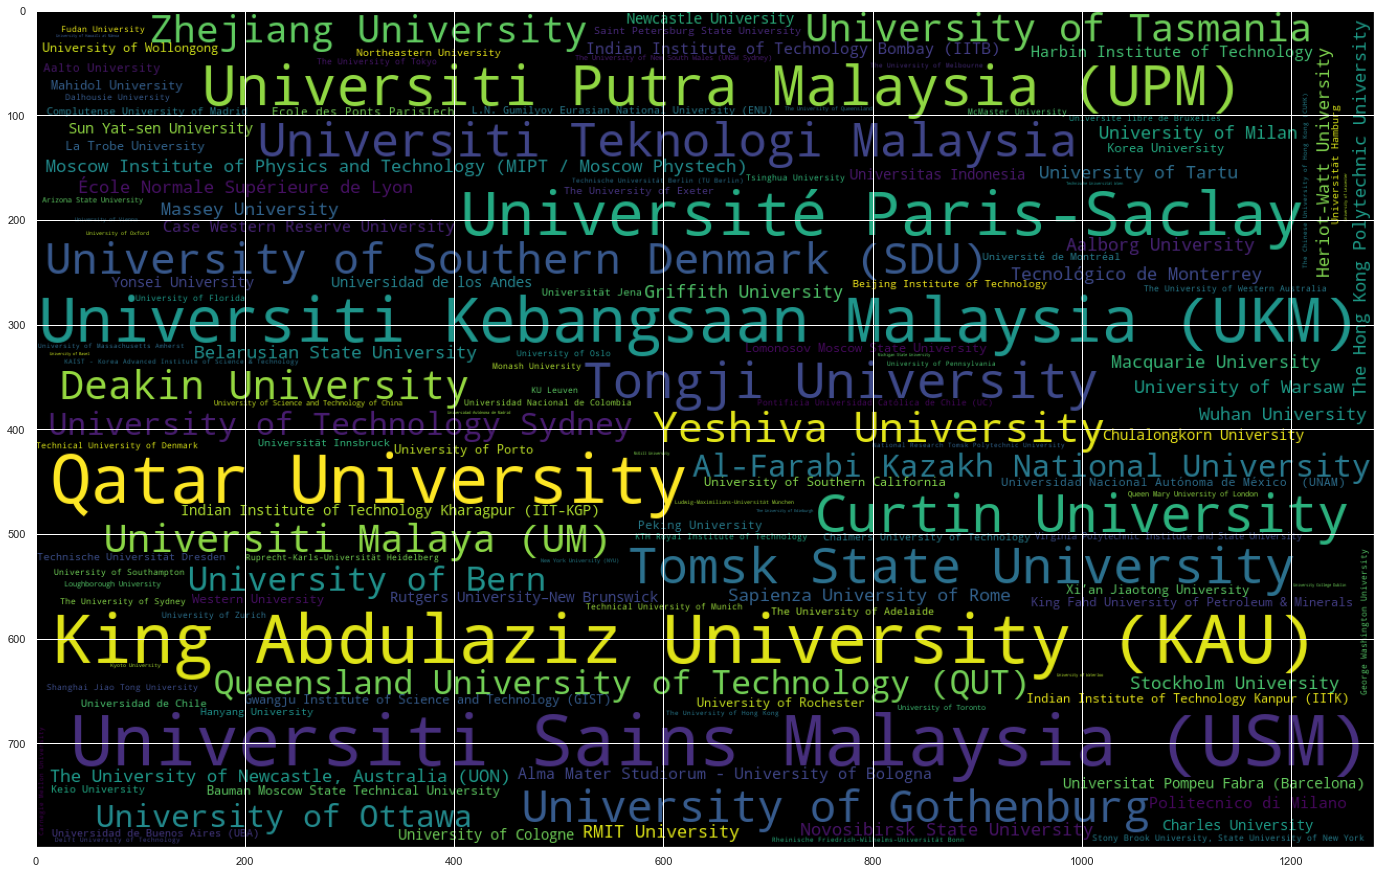

In [292]:
from wordcloud import WordCloud

d = {
    u : c
    for u, c in zip(
        compared_data['university'],
        compared_data['ranking_change']
    )
}

wc = WordCloud(width = 1280, height = 800).generate_from_frequencies(d)
plt.figure(figsize=(24,16))
plt.imshow(wc)
wc.to_file('wordcloud_positive.png')

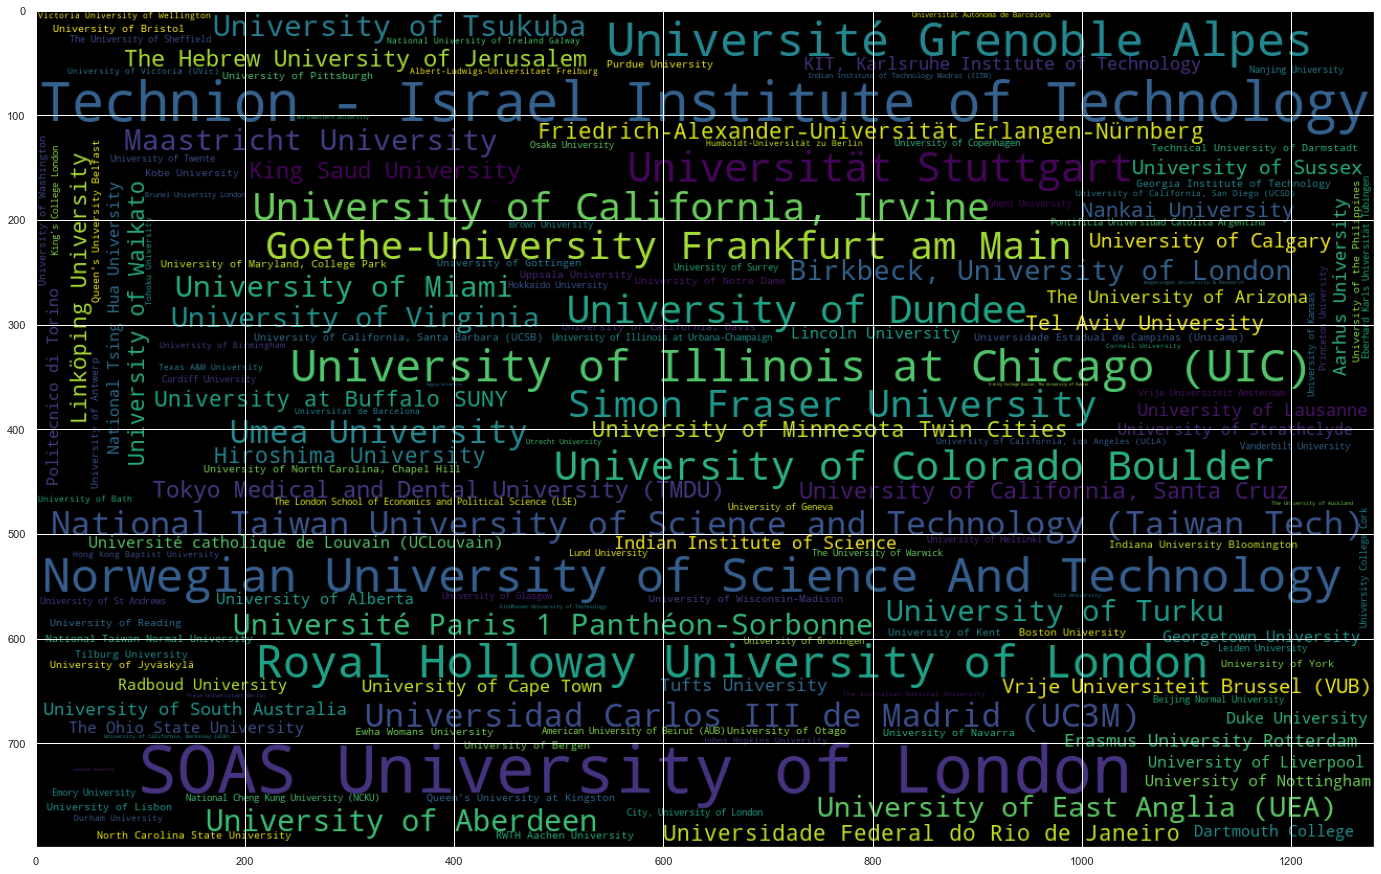

In [309]:
from wordcloud import WordCloud

d = {
    u : -c
    for u, c in zip(
        compared_data['university'],
        compared_data['ranking_change']
    )
}

wc = WordCloud(width = 1280, height = 800).generate_from_frequencies(d)
plt.figure(figsize=(24,16))
plt.imshow(wc)
wc.to_file('wordcloud_negative.png')